In [1]:
%load_ext autoreload
import os

os.chdir("../../../")

In [2]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Import model constructors
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor,
    ExtraTreesClassifier, ExtraTreesRegressor
)
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression


from wfh_share_estimation import *
files  = os.listdir('experiments/results')
files = [f for f in files if f.endswith('.csv')]

classifier_mapping = {
    "RandomForest": RandomForestClassifier,
    "GradientBoosting": GradientBoostingClassifier,
    "ExtraTrees": ExtraTreesClassifier,
    "XGB": XGBClassifier,
    "SVC": SVC,
    "LogisticRegression": LogisticRegression,
    "KNeighbors": KNeighborsClassifier,
    # add additional classifier types if needed
}

regressor_mapping = {
    "RandomForest": RandomForestRegressor,
    "GradientBoosting": GradientBoostingRegressor,
    "ExtraTrees": ExtraTreesRegressor,
    "XGB": XGBRegressor,
    "SVR": SVR,
    "KNeighbors": KNeighborsRegressor,
    "LinearRegression": LinearRegression,
    # add additional regressor types if needed
}

results = pd.DataFrame()
for f in files:
    df = pd.read_csv('experiments/results/' + f)
    df['file'] = f
    results = pd.concat([results, df])

In [3]:
results.sort_values('correlation_non_zero', ascending=False).head(10)

,evaluation_strategy,n_bootstrap,classifier_type,classifier_params,zero_threshold,regressor_type,regressor_params,f1,mae,mae_non_zero,correlation,correlation_non_zero,file
270,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914337,0.050161,0.105902,0.853330,0.719999,ExtraTrees_clf_SVR_reg_20250217181606.csv
30,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914493,0.050219,0.105955,0.853332,0.719956,ExtraTrees_clf_SVR_reg_20250217181606.csv
630,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915506,0.050177,0.106077,0.853207,0.719885,ExtraTrees_clf_SVR_reg_20250217181606.csv
570,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 5, 'max_fea...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.906586,0.050617,0.106327,0.852248,0.719841,ExtraTrees_clf_SVR_reg_20250217181606.csv
690,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914402,0.050287,0.106115,0.853009,0.719799,ExtraTrees_clf_SVR_reg_20250217181606.csv
450,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915222,0.050235,0.106005,0.853122,0.719795,ExtraTrees_clf_SVR_reg_20250217181606.csv
270,bootstrap,100,RandomForest,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915269,0.050098,0.106336,0.853249,0.719718,RandomForest_clf_SVR_reg_20250217221725.csv
390,bootstrap,100,RandomForest,"{'n_estimators': 200, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.916433,0.050082,0.106412,0.853273,0.719702,RandomForest_clf_SVR_reg_20250217221725.csv
90,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.912046,0.050400,0.106064,0.852884,0.719680,ExtraTrees_clf_SVR_reg_20250217181606.csv
30,bootstrap,100,RandomForest,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915258,0.050106,0.106349,0.853228,0.719665,RandomForest_clf_SVR_reg_20250217221725.csv


In [4]:
# Select the experiment with the best performance in the non-zero
(
    evaluation_strategy,
    n_bootstrap,
    classifier_type,
    classifier_params,
    zero_threshold,
    regressor_type,
    regressor_params,
    f1,
    mae,
    mae_non_zero,
    correlation,
    correlation_non_zero,
    file_name
) =  results.sort_values('correlation_non_zero', ascending=False).iloc[0].values

In [5]:
data_list = ['WORK_ACTIVITIES', 'WORK_CONTEXT']
metric = ['importance', 'context']
data_store = DataStore(data_list = data_list, 
                    metric=metric) 

Zero-Class F1: 0.8888888888888888
Non-Zero MAE: 0.10676645093917712
Overall MAE: 0.0603578492301173


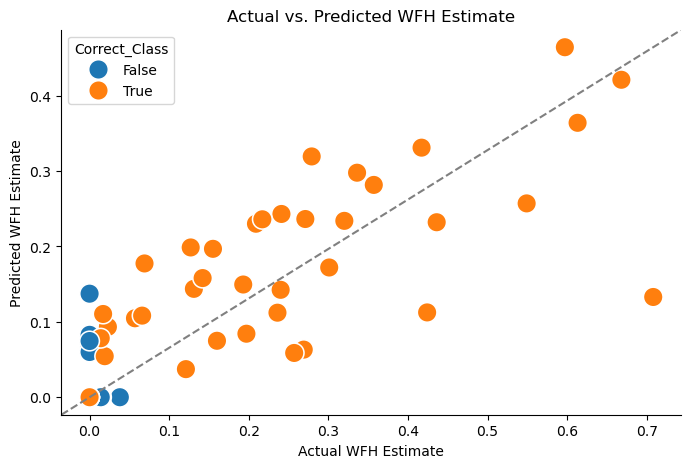

In [6]:
pipeline = ModelPipeline(
            data=data_store, 
            classifier_model=classifier_mapping[classifier_type](**ast.literal_eval(classifier_params)),
            regressor_model=regressor_mapping[regressor_type](**ast.literal_eval(regressor_params)),
            zero_threshold=zero_threshold
)

pipeline.train()
pipeline.evaluate()
pipeline.plot_manager.show_plot("test_prediction")

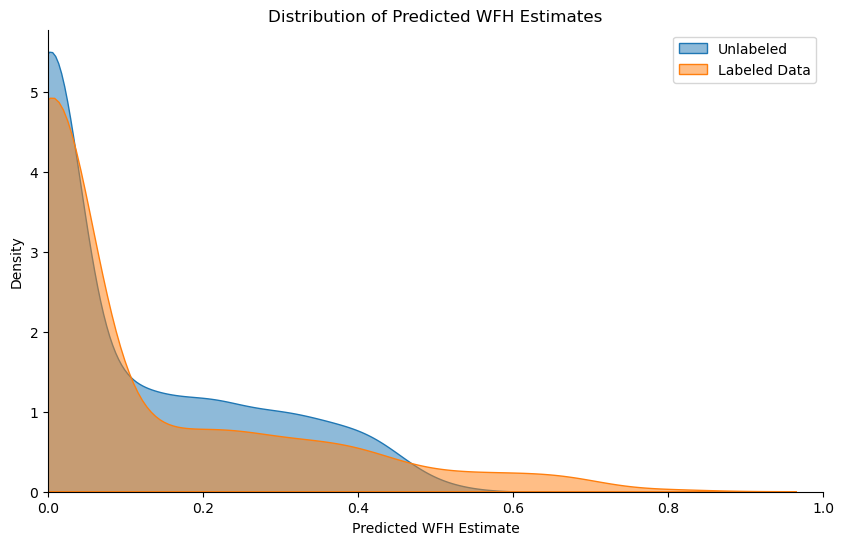

In [7]:
pipeline.predict_unlabeled()
pipeline.plot_manager.show_plot("unlabeled_prediction")

In [8]:
# Unlabelled data
unlabeled = pipeline.data.unlabeled_data[["ESTIMATE_WFH_ABLE"]]

top_wfh = unlabeled.sort_values('ESTIMATE_WFH_ABLE', ascending=False).head(10)
non_wfh = unlabeled[unlabeled['ESTIMATE_WFH_ABLE'] == 0]

In [9]:
top_wfh.get_occ_data()

AttributeError: 'NoneType' object has no attribute 'copy'

,ONET_SOC_CODE,ESTIMATE_WFH_ABLE
ONET_SOC_CODE,,
Treasurers and Controllers,11-3031.01,0.525350
Investment Fund Managers,11-3031.03,0.503484
Survey Researchers,19-3022.00,0.479202
Bioinformatics Scientists,19-1029.01,0.476635
Industrial-Organizational Psychologists,19-3032.00,0.468628
Database Architects,15-1243.00,0.459610
Search Marketing Strategists,13-1161.01,0.451255
Clinical Data Managers,15-2051.02,0.448216
Web Administrators,15-1299.01,0.445960


In [10]:
non_wfh.sample(10).get_occ_data()

AttributeError: 'NoneType' object has no attribute 'copy'

,ONET_SOC_CODE,ESTIMATE_WFH_ABLE
ONET_SOC_CODE,,
"Welding, Soldering, and Brazing Machine Setters, Operators, and Tenders",51-4122.00,0.0
Costume Attendants,39-3092.00,0.0
Bicycle Repairers,49-3091.00,0.0
"Excavating and Loading Machine and Dragline Operators, Surface Mining",47-5022.00,0.0
Helpers--Carpenters,47-3012.00,0.0
Jewelers and Precious Stone and Metal Workers,51-9071.00,0.0
Radiologists,29-1224.00,0.0
Cargo and Freight Agents,43-5011.00,0.0
"Roof Bolters, Mining",47-5043.00,0.0
